In [5]:
import pandas as pd

df_anual = pd.read_csv("P070554752025092313192901 ACCIDENTES DE TRÁNSITO POR AÑO.csv", encoding = "latin-1")


In [6]:
df_anual.shape

(10, 14)

In [7]:
df_anual.head()

,Año,Bocas del Toro,Coclé,Colón,Chiriquí,Darién,Herrera,Los Santos,Panamá,Panamá Oeste,Veraguas,Comarca Kuna Yala,Comarca Emberá,Comarca Ngäbe Buglé
0,2015,399,1558,2878,3463,122,845,650,31291,5460,1410,0,0,42
1,2016,476,1739,3408,4162,194,1078,765,34858,7129,1625,0,0,52
2,2017,499,1738,3426,4906,237,1141,861,34668,7571,1732,0,0,68
3,2018,507,1353,3382,4768,226,1001,804,33405,7832,1721,0,0,54
4,2019,508,1271,3123,4699,197,1053,752,30141,8028,1698,1,0,57


In [10]:
print(df_anual.shape)
print(df_anual.columns.tolist())
print(df_anual.head(10))

(10, 14)
['Año', 'Bocas del Toro', 'Coclé', 'Colón', 'Chiriquí', 'Darién', 'Herrera', 'Los Santos', 'Panamá', 'Panamá Oeste', 'Veraguas', 'Comarca Kuna Yala', 'Comarca Emberá', 'Comarca Ngäbe Buglé']
    Año  Bocas del Toro  Coclé  Colón  Chiriquí  Darién  Herrera  Los Santos  \
0  2015             399   1558   2878      3463     122      845         650   
1  2016             476   1739   3408      4162     194     1078         765   
2  2017             499   1738   3426      4906     237     1141         861   
3  2018             507   1353   3382      4768     226     1001         804   
4  2019             508   1271   3123      4699     197     1053         752   
5  2020             366    933   1925      2857     122      763         528   
6  2021             522   1317   2585      4068     169      968         613   
7  2022             453   1459   2848      3744     165     1011         647   
8  2023             440   1573   2509      4014     175     1007         690   


# Como esta en formato ancho, vamos a acomodarlo a un formato larga para un mejor analisis

In [17]:
df_anual_largo = df_anual.melt(#utilizamos el 'melt()'
    id_vars=["Año"],
    var_name="Provincia",
    value_name="Accidentes"
)
print(df_anual_largo.shape)
print(df_anual_largo.head(10))

(130, 3)
    Año       Provincia  Accidentes
0  2015  Bocas del Toro         399
1  2016  Bocas del Toro         476
2  2017  Bocas del Toro         499
3  2018  Bocas del Toro         507
4  2019  Bocas del Toro         508
5  2020  Bocas del Toro         366
6  2021  Bocas del Toro         522
7  2022  Bocas del Toro         453
8  2023  Bocas del Toro         440
9  2024  Bocas del Toro         536


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12

In [19]:
df_anual_largo.groupby("Año")["Accidentes"].sum()

Año
2015    48118
2016    55486
2017    56847
2018    55053
2019    51528
2020    30221
2021    40165
2022    43178
2023    45614
2024    48887
Name: Accidentes, dtype: int64

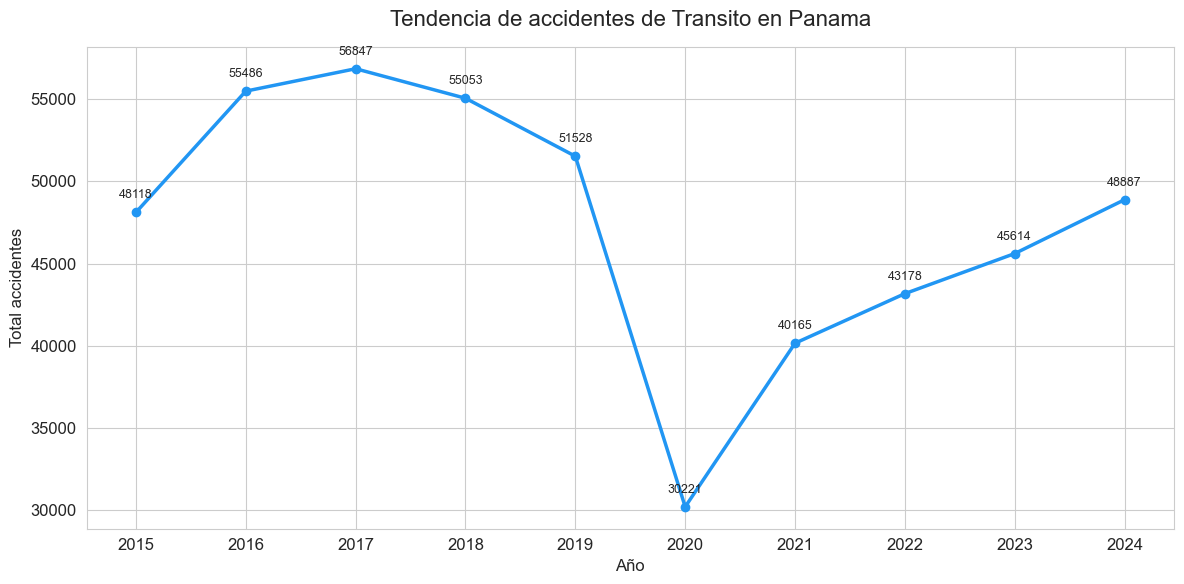

In [24]:
fig, ax = plt.subplots()

total_por_año = df_anual_largo.groupby("Año")["Accidentes"].sum()

total_por_año.plot(
    kind = "line",
    ax=ax,
    color="#2196F3",
    linewidth=2.5,
    marker="o",
    markersize=6
)

ax.set_title("Tendencia de accidentes de Transito en Panama",fontsize=16, pad=15)
ax.set_xlabel("Año",fontsize=12)
ax.set_ylabel("Total accidentes",fontsize=12)
ax.tick_params(axis="x",rotation=0)

for x, y in zip(total_por_año.index, total_por_año.values):
    ax.annotate(str(y), (x, y), textcoords="offset points", xytext=(0, 10), ha="center", fontsize=9)

ax.set_xticks(total_por_año.index)
plt.tight_layout()
plt.savefig("Tendencias-anual.png",dpi=150)
plt.show()


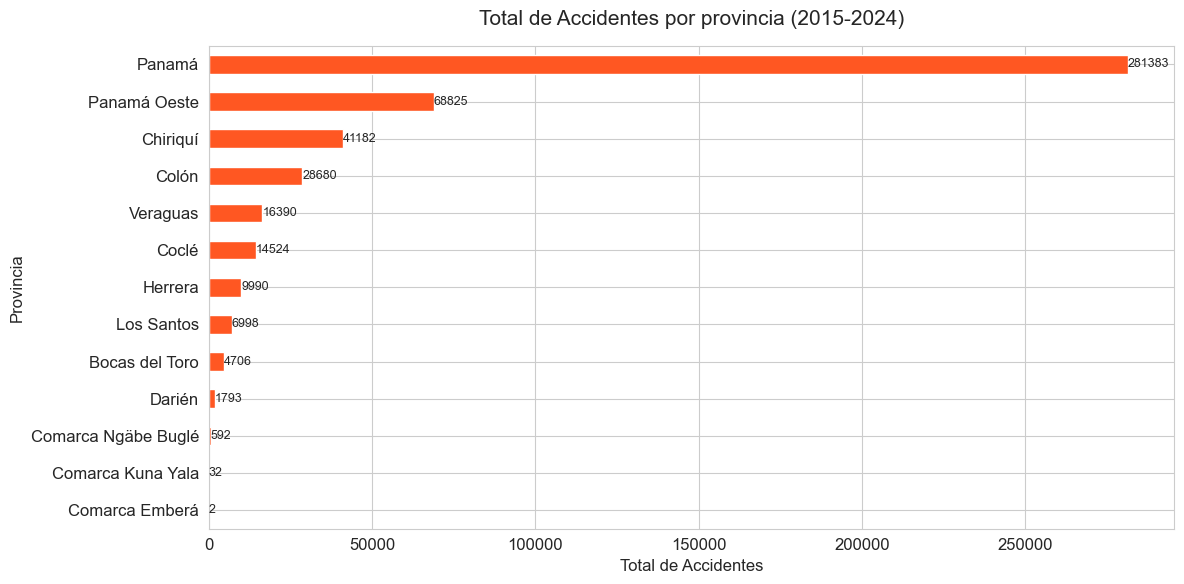

In [27]:
fig, ax = plt.subplots()
total_por_provincia = df_anual_largo.groupby("Provincia")["Accidentes"].sum().sort_values(ascending=True)

total_por_provincia.plot(
    kind="barh",
    ax=ax,
    color="#FF5722",
    edgecolor="white"
)

ax.set_title("Total de Accidentes por provincia (2015-2024)",fontsize=15,pad=15)
ax.set_xlabel("Total de Accidentes",fontsize=12)
ax.set_ylabel("Provincia",fontsize=12)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("Total-Por-provincia.png",dpi=150)
plt.show()


# Vamos a hacer mas justa la grafica para comparar de mejor manera

### utilizaremos datos de la poblacion de cada provincia y comarca

In [28]:
poblacion = {
    "Panamá": 1600000,
    "Panamá Oeste": 700000,
    "Chiriquí": 500000,
    "Colón": 280000,
    "Veraguas": 240000,
    "Coclé": 260000,
    "Herrera": 120000,
    "Los Santos": 95000,
    "Bocas del Toro": 180000,
    "Darién": 60000,
    "Comarca Ngäbe Buglé": 260000,
    "Comarca Kuna Yala": 40000,
    "Comarca Emberá": 12000
}

In [30]:
total_por_provincia = df_anual_largo.groupby("Provincia")["Accidentes"].sum()

df_normalizado = pd.DataFrame({
    "Provincia": total_por_provincia.index,
    "Total_accidentes": total_por_provincia.values
})

df_normalizado["poblacion"] = df_normalizado["Provincia"].map(poblacion)
df_normalizado["AccidentesX100k"]= (df_normalizado["Total_accidentes"]/ df_normalizado["poblacion"])*100000
df_normalizado = df_normalizado.sort_values("AccidentesX100k",ascending=True)

print(df_normalizado[["Provincia","AccidentesX100k"]].to_string())

              Provincia  AccidentesX100k
4        Comarca Emberá        16.666667
5     Comarca Kuna Yala        80.000000
6   Comarca Ngäbe Buglé       227.692308
0        Bocas del Toro      2614.444444
7                Darién      2988.333333
2                 Coclé      5586.153846
12             Veraguas      6829.166667
9            Los Santos      7366.315789
1              Chiriquí      8236.400000
8               Herrera      8325.000000
11         Panamá Oeste      9832.142857
3                 Colón     10242.857143
10               Panamá     17586.437500


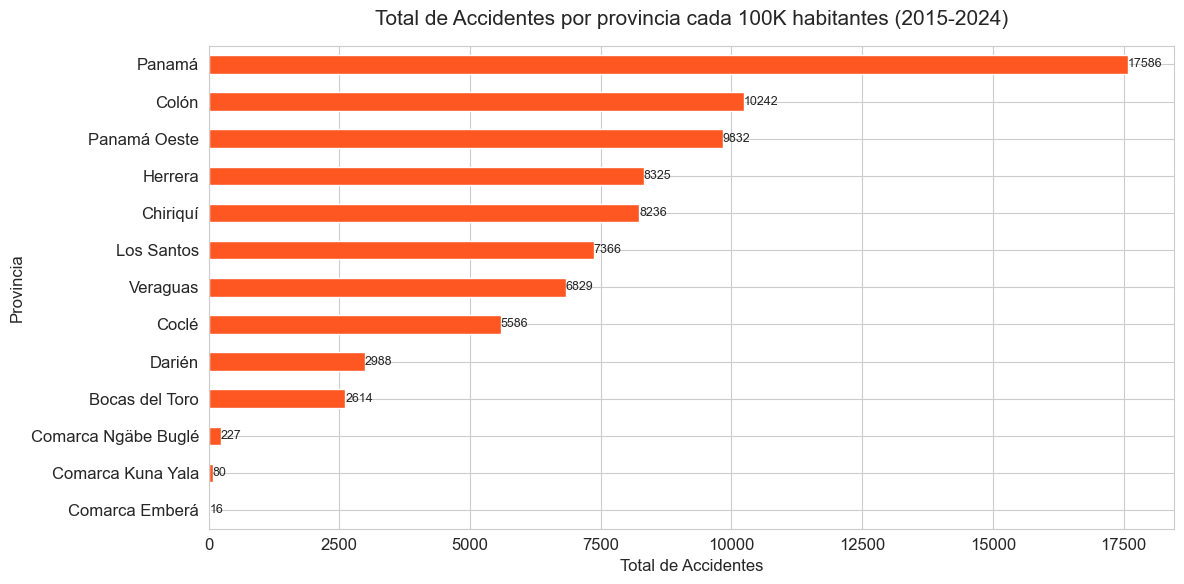

In [32]:
fig, ax = plt.subplots()
total_por_provincia_cada_100k = df_normalizado.groupby("Provincia")["AccidentesX100k"].sum().sort_values(ascending=True)

total_por_provincia_cada_100k.plot(
    kind="barh",
    ax=ax,
    color="#FF5722",
    edgecolor="white"
)

ax.set_title("Total de Accidentes por provincia cada 100K habitantes (2015-2024)",fontsize=15,pad=15)
ax.set_xlabel("Total de Accidentes",fontsize=12)
ax.set_ylabel("Provincia",fontsize=12)
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha="left", va="center", fontsize=9)

plt.tight_layout()
plt.savefig("Total-Por-provincia.png",dpi=150)
plt.show()

In [2]:
df_dia =pd.read_csv("P070554752025092313505407 ACCIDENTES DE TRÁNSITO POR DIA Y CLASE ACCIDENTE.csv", encoding="latin-1")

df_dia.head()

,Distrito y Resto de la República,Clase de accidente de tránsito,Domingo,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado
0,Distrito de Panamá,Colisión,1550,3018,3201,3258,3088,3501,2624
1,Distrito de Panamá,Colisión con objeto fijo,251,307,269,282,253,294,314
2,Distrito de Panamá,Vuelco (Caída en cuneta),36,28,32,25,26,19,28
3,Distrito de Panamá,Atropello,57,74,68,74,63,74,76
4,Distrito de Panamá,Caída de persona o cosa del vehículo en marcha,8,12,7,18,12,19,15


In [3]:
df_dia_largo = df_dia.melt(#utilizamos el 'melt()'
    id_vars=["Distrito y Resto de la República","Clase de accidente de tránsito"],
    var_name="Dia",
    value_name="Accidentes"
)
df_dia_largo.head(10)

,Distrito y Resto de la República,Clase de accidente de tránsito,Dia,Accidentes
0,Distrito de Panamá,Colisión,Domingo,1550
1,Distrito de Panamá,Colisión con objeto fijo,Domingo,251
2,Distrito de Panamá,Vuelco (Caída en cuneta),Domingo,36
3,Distrito de Panamá,Atropello,Domingo,57
4,Distrito de Panamá,Caída de persona o cosa del vehículo en marcha,Domingo,8
5,Distrito de Panamá,Colisión y vuelco,Domingo,34
6,Distrito de Panamá,Colisión y atropello,Domingo,4
7,Distrito de Panamá,Atropello y fuga,Domingo,1
8,Distrito de Panamá,Atropello y colisión,Domingo,0
9,Distrito de Panamá,Atropello y vuelco,Domingo,0


In [10]:
df_dia_largo["Dia"] = df_dia_largo["Dia"].replace({
    " Domingo ": "Domingo",
    " Martes ": "Martes"
})
print(df_dia_largo["Dia"].unique())

['Domingo' 'Lunes' 'Martes' 'Miércoles' 'Jueves' 'Viernes' 'Sábado']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 12


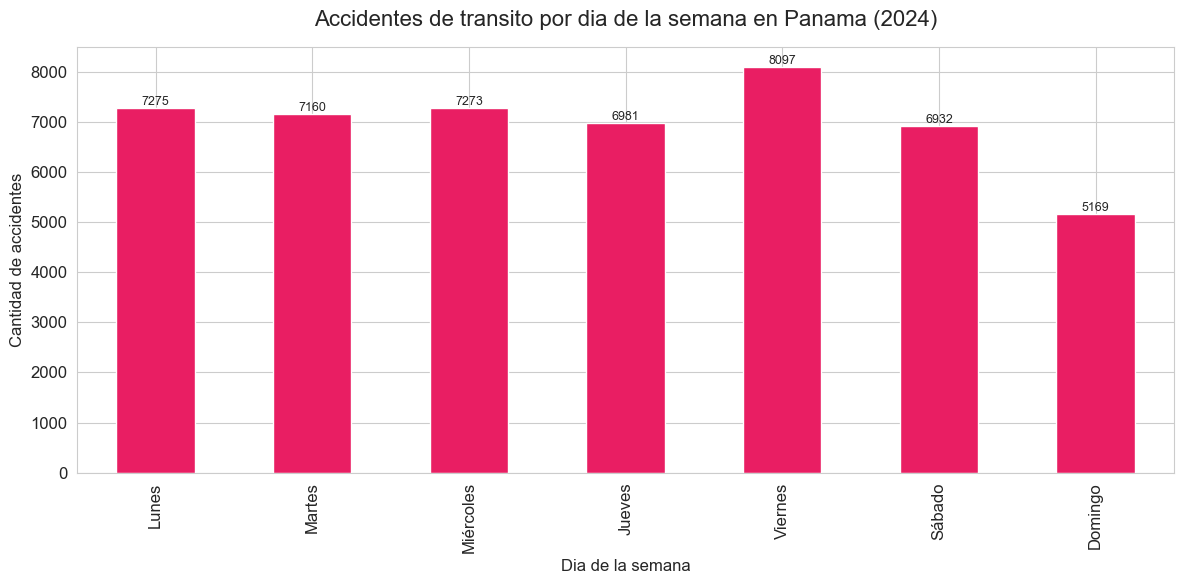

In [11]:
fig, ax = plt.subplots()

orden_dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
accidentes_por_dias = df_dia_largo.groupby("Dia")["Accidentes"].sum()
accidentes_por_dias = accidentes_por_dias.reindex(Orden_dias)

accidentes_por_dias.plot(
    kind="bar",
    ax=ax,
    color="#E91E63",
    edgecolor="white"
)

ax.set_title("Accidentes de transito por dia de la semana en Panama (2024)",fontsize=16,pad=15)
ax.set_xlabel("Dia de la semana", fontsize=12)
ax.set_ylabel("Cantidad de accidentes",fontsize=12)

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.savefig("Accidentes_de_transito_por_dia_Panama_(2024).png",dpi=150)
plt.show()

In [22]:
df_hora = pd.read_csv("P070554752025092314071213 ACCIDENTES DE TRÁNSITO DIA Y HORA.csv",encoding="latin-1")
print(df_hora.shape)
print(df_hora.head(10))
print(df_hora.columns.tolist())

(101, 9)
  Distrito y Resto de la República     Hora  Domingo  Lunes  Martes  \
0               Distrito de Panamá  12 p.m.       69     39      26   
1               Distrito de Panamá   1 a.m.       41     25      13   
2               Distrito de Panamá   2 a.m.       42     31       9   
3               Distrito de Panamá   3 a.m.       42     24      18   
4               Distrito de Panamá   4 a.m.       62     41      33   
5               Distrito de Panamá   5 a.m.       56     92      74   
6               Distrito de Panamá   6 a.m.       54    157     142   
7               Distrito de Panamá   7 a.m.       62    217     228   
8               Distrito de Panamá   8 a.m.       53    170     238   
9               Distrito de Panamá   9 a.m.       67    172     202   

   Miércoles  Jueves  Viernes  Sábado  
0         43      30       48      54  
1         14      37       37      28  
2         14       8       15      48  
3         10      20       20      46  
4        

In [23]:
df_hora_largo = df_hora.melt(
    id_vars = ["Distrito y Resto de la República","Hora"],
    var_name = "Dia",
    value_name="Accidentes"
)

df_hora_largo.head(10)

,Distrito y Resto de la República,Hora,Dia,Accidentes
0,Distrito de Panamá,12 p.m.,Domingo,69
1,Distrito de Panamá,1 a.m.,Domingo,41
2,Distrito de Panamá,2 a.m.,Domingo,42
3,Distrito de Panamá,3 a.m.,Domingo,42
4,Distrito de Panamá,4 a.m.,Domingo,62
5,Distrito de Panamá,5 a.m.,Domingo,56
6,Distrito de Panamá,6 a.m.,Domingo,54
7,Distrito de Panamá,7 a.m.,Domingo,62
8,Distrito de Panamá,8 a.m.,Domingo,53
9,Distrito de Panamá,9 a.m.,Domingo,67


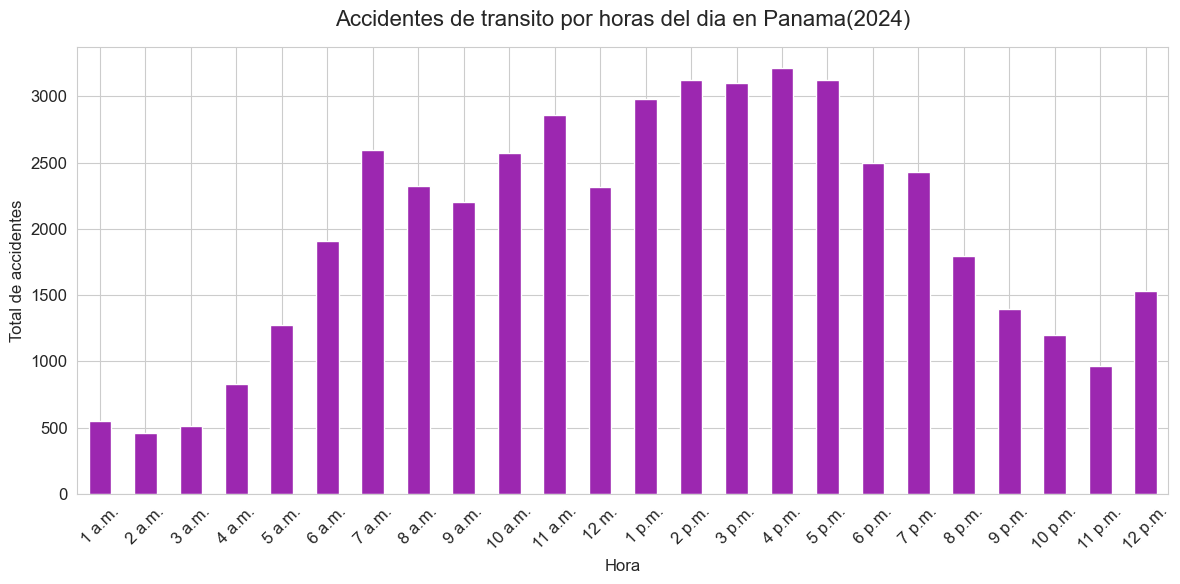

In [28]:
fig, ax = plt.subplots()

orden_horas = ["1 a.m.", "2 a.m.", "3 a.m.", "4 a.m.", "5 a.m.", "6 a.m.",
               "7 a.m.", "8 a.m.", "9 a.m.", "10 a.m.", "11 a.m.", "12 m.",
               "1 p.m.", "2 p.m.", "3 p.m.", "4 p.m.", "5 p.m.", "6 p.m.",
               "7 p.m.", "8 p.m.", "9 p.m.", "10 p.m.", "11 p.m.", "12 p.m."]

accidentes_por_hora = df_hora_largo.groupby("Hora")["Accidentes"].sum()
accidentes_por_hora = accidentes_por_hora.reindex(orden_horas)
accidentes_por_hora.plot(
    kind = "bar",
    ax=ax,
    color = "#9C27B0",
    edgecolor="white"
)
ax.set_title("Accidentes de transito por horas del dia en Panama(2024)", fontsize=16, pad=15)
ax.set_xlabel("Hora", fontsize=12)
ax.set_ylabel("Total de accidentes", fontsize=12)
ax.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.savefig("horas.png", dpi=150)
plt.show()

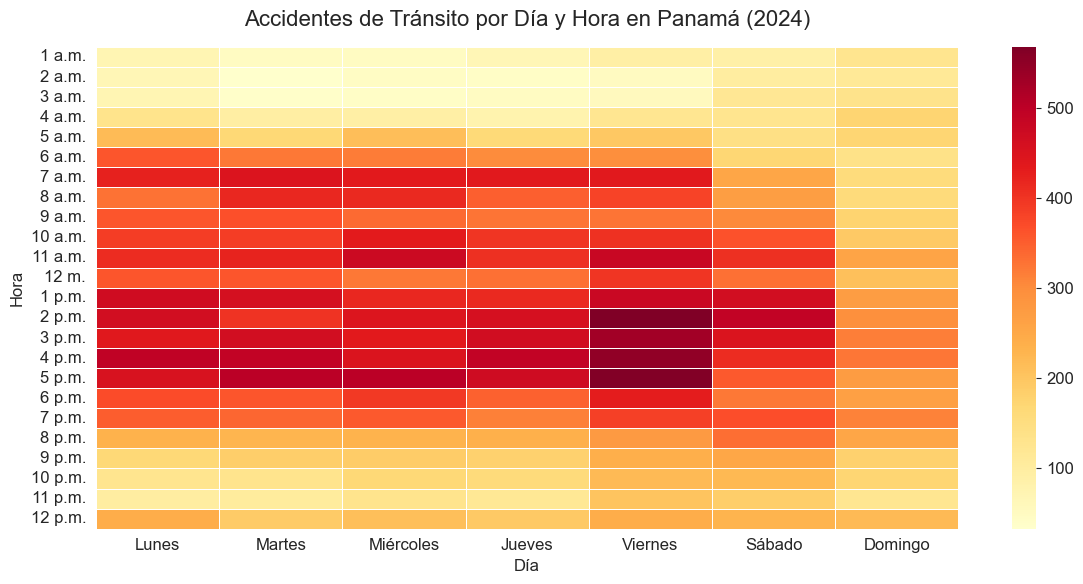

In [29]:
fig, ax = plt.subplots()

orden_horas = ["1 a.m.", "2 a.m.", "3 a.m.", "4 a.m.", "5 a.m.", "6 a.m.",
               "7 a.m.", "8 a.m.", "9 a.m.", "10 a.m.", "11 a.m.", "12 m.",
               "1 p.m.", "2 p.m.", "3 p.m.", "4 p.m.", "5 p.m.", "6 p.m.",
               "7 p.m.", "8 p.m.", "9 p.m.", "10 p.m.", "11 p.m.", "12 p.m."]

orden_dias = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]

pivot = df_hora_largo.pivot_table(
    index = "Hora",
    columns= "Dia",
    values = "Accidentes",
    aggfunc="sum"
)

pivot=pivot.reindex(index=orden_horas,columns=orden_dias)

sns.heatmap(
    pivot,
    ax=ax,
    cmap="YlOrRd",
    linewidth=0.5,
    annot=False,
    fmt="d"
)

ax.set_title("Accidentes de Tránsito por Día y Hora en Panamá (2024)", fontsize=16, pad=15)
ax.set_xlabel("Día", fontsize=12)
ax.set_ylabel("Hora", fontsize=12)

plt.tight_layout()
plt.savefig("heatmap_dia_hora.png", dpi=150)
plt.show()